## API do Pandas no Spark

Importamos a API do pandas no Spark da seguinte forma:

In [1]:
from pyspark import SparkConf
from pyspark.sql import SparkSession

conf = SparkConf()
conf.set('spark.jars.packages', 'org.apache.hadoop:hadoop-aws:3.2.0')
conf.set('spark.hadoop.fs.s3a.aws.credentials.provider', 'com.amazonaws.auth.InstanceProfileCredentialsProvider')
spark = SparkSession.builder.config(conf=conf).getOrCreate()






:: loading settings :: url = jar:file:/Users/felipeazevedo/GITHUB/grupo-g2-pi-2022/PYSPARK-SPRINT-3/env/lib/python3.10/site-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /Users/felipeazevedo/.ivy2/cache
The jars for the packages stored in: /Users/felipeazevedo/.ivy2/jars
org.apache.hadoop#hadoop-aws added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-ef033eac-af18-4513-ad99-f84482261ca9;1.0
	confs: [default]
	found org.apache.hadoop#hadoop-aws;3.2.0 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.375 in central
downloading https://repo1.maven.org/maven2/org/apache/hadoop/hadoop-aws/3.2.0/hadoop-aws-3.2.0.jar ...
	[SUCCESSFUL ] org.apache.hadoop#hadoop-aws;3.2.0!hadoop-aws.jar (1554ms)
downloading https://repo1.maven.org/maven2/com/amazonaws/aws-java-sdk-bundle/1.11.375/aws-java-sdk-bundle-1.11.375.jar ...
	[SUCCESSFUL ] com.amazonaws#aws-java-sdk-bundle;1.11.375!aws-java-sdk-bundle.jar (31360ms)
:: resolution report :: resolve 23444ms :: artifacts dl 32923ms
	:: modules in use:
	com.amazonaws#aws-java-sdk-bundle;1.11.375 from central in [default]
	org.apache.hadoop#hadoop-aws;3.2.0 

In [29]:
import pandas as pd
import numpy as np
import pyspark.pandas as ps

In [ ]:
#pip install matplotlib

In [ ]:
#pip install pandas


## Criação de Objetos

### Criando uma série pandas-on-Spark passando uma lista de valores, permitindo que a API pandas no Spark crie um índice inteiro padrão:

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
psdf = pd.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [6]:
psdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


## Criando um DataFrame pandas passando uma matriz numpy, com um índice de data e hora e colunas rotuladas:

In [7]:
dates = pd.date_range('20130101', periods=6)

In [8]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [10]:
pdf

,A,B,C,D
2013-01-01,-0.546688,1.390297,0.779862,-0.511817
2013-01-02,-0.334873,-1.068641,-0.007298,-0.644298
2013-01-03,0.854681,0.473475,-0.900421,0.590255
2013-01-04,-1.020505,-1.777306,0.375333,0.352811
2013-01-05,-0.078520,0.736426,2.313910,1.959046
2013-01-06,-0.385759,-0.950487,-0.445351,-0.530973


### Agora, é possível criar um DataFrame pandas-on-Spark a partir do Spark DataFrame facilmente. 

In [11]:
spark = SparkSession.builder.getOrCreate()

In [12]:
sdf = spark.createDataFrame(pdf)

In [13]:
sdf.show()

+--------------------+-------------------+--------------------+-------------------+
|                   A|                  B|                   C|                  D|
+--------------------+-------------------+--------------------+-------------------+
| -0.5466883976882615| 1.3902972004522829|  0.7798624686558643| -0.511816585452175|
| -0.3348725247548573| -1.068641472629192|-0.00729807798735...|-0.6442983956623511|
|  0.8546806073827313| 0.4734754893111552| -0.9004210189600513| 0.5902546022249997|
| -1.0205053373724646|-1.7773062466596297|  0.3753330118692941| 0.3528111841541079|
|-0.07852038262903008| 0.7364263133932722|  2.3139103462469173| 1.9590459898760755|
|-0.38575936767401653|-0.9504865635314748|-0.44535097197378654|-0.5309730462978761|
+--------------------+-------------------+--------------------+-------------------+



## Criando pandas-on-Spark DataFrame do Spark DataFrame.

In [14]:
sdf.dtypes

[('A', 'double'), ('B', 'double'), ('C', 'double'), ('D', 'double')]

In [15]:
sdf.head()

Row(A=-0.5466883976882615, B=1.3902972004522829, C=0.7798624686558643, D=-0.511816585452175)

In [16]:
sdf.columns

['A', 'B', 'C', 'D']

# Representação Gráfica

In [17]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [34]:
psser = ps.Series(pser)

NonExistentTimeError: 2000-10-08 00:00:00

In [35]:
psser = psser.cummax()

<AxesSubplot:>

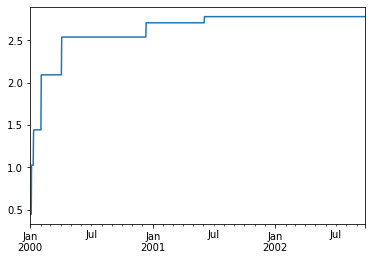

In [36]:
psser.plot()

## Plotando de outra forma

In [23]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

In [31]:
psdf = ps.from_pandas(pdf)

NonExistentTimeError: 2000-10-08 00:00:00

In [32]:
psdf = psdf.cummax()

<AxesSubplot:>

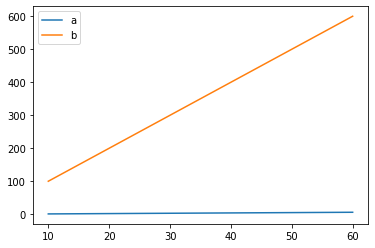

In [33]:
psdf.plot()